# UTS

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

# METODE KNN

In [15]:
# Mengimport library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [14]:
# membuat objek koleksi yang berisi dataset iris dan atributnya
df = pd.read_csv("https://raw.githubusercontent.com/DwiAsfi/datamining/main/dataR2.csv")

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [16]:
#periksa jumlah baris dan kolom pada dataset
df.shape

(116, 10)

### Hitung Data

*   Pisahkan kolom "variety" dari *dataframe*
*   Ambil kolom "variety" sebagai target kolom untuk kategori kelas
*   Pisahkan data latih dengan data tes


```
# data latih (nilai data)
X_train 

# data tes (nilai data)
X_test 

# data latih (kelas data)
y_train

# data tes (kelas data)
y_test
```

In [2]:
# membuat data dengan semua data kecuali targer kolom
X = df.drop(columns=["Classification"])
# cek apakah variabel target sudah dihapus
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [3]:
#separate target values
y = df["Classification"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [22]:
# Membagi data ke data test dan data training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [23]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-1.99870762e-01,  1.77497398e+00,  1.11147412e+00,
         2.42579535e-01,  2.63712046e-01,  3.32084933e+00,
        -3.53601251e-01, -7.98401203e-01, -8.96813736e-01],
       [-2.61575829e-01,  1.92667044e+00,  2.16240100e-01,
         6.71901217e-02,  2.71926419e-03,  5.62315407e-02,
         1.30573410e+00, -3.89670515e-01,  4.67707681e-01],
       [ 9.10820452e-01, -3.68794536e-01, -7.28729138e-01,
        -6.76319466e-01, -5.30791475e-01, -6.07166943e-02,
         3.19975082e+00, -9.39015325e-01, -3.99043511e-01],
       [-3.84985964e-01, -1.69222255e+00, -1.81641684e-01,
        -5.20238052e-01, -4.13823515e-01, -7.90474522e-01,
        -6.57635110e-01, -7.58294756e-01, -1.26169663e+00],
       [-1.18715184e+00, -8.29930211e-01, -1.07687570e+00,
        -3.76893851e-01, -3.95202370e-01, -5.70764749e-01,
         1.01859454e+00, -4.61398643e-01, -1.04901974e+00]])

In [24]:
# Membangun KNN Classifier
KNN = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
# Memeriksa keakuratan model pada data uji
KNN.score(X_test, y_test)

0.9166666666666666

In [27]:
# Hasil Akurasi
from sklearn.metrics import *
import numpy as np

#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, KNN.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, KNN.predict(X_test)))
print(F'Precision:', precision_score(y_test, KNN.predict(X_test)))
print(F'Recall:', recall_score(y_test, KNN.predict(X_test)))
print(F'F1 Score:', f1_score(y_test, KNN.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, KNN.predict(X_test)) )

print( F'Balanced Accuracy Score:',balanced_accuracy_score(y_test, KNN.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(y_test, KNN.predict(X_test)) )
print()#Print a new line

              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        13

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24

Accuracy: 0.9166666666666666
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091
Roc Auc Score: 0.9160839160839161
Balanced Accuracy Score: 0.916083916083916
Confusion Matrix: [[10  1]
 [ 1 12]]



# DECISSION TREE

In [28]:
#Mengimport Modul
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [29]:
# membuat objek koleksi yang berisi dataset iris dan atributnya
df = pd.read_csv("https://raw.githubusercontent.com/DwiAsfi/datamining/main/dataR2.csv")

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [30]:
y = df["Classification"]
X = df.drop(columns=["Classification"])

In [31]:
# Split Data
# 70% training dan 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [32]:
# Membangun decission tree menggunakan gini
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,y_train)

# Prediksi data test
y_pred = clf.predict(X_test)

In [33]:
# Mencari akurasi
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7428571428571429


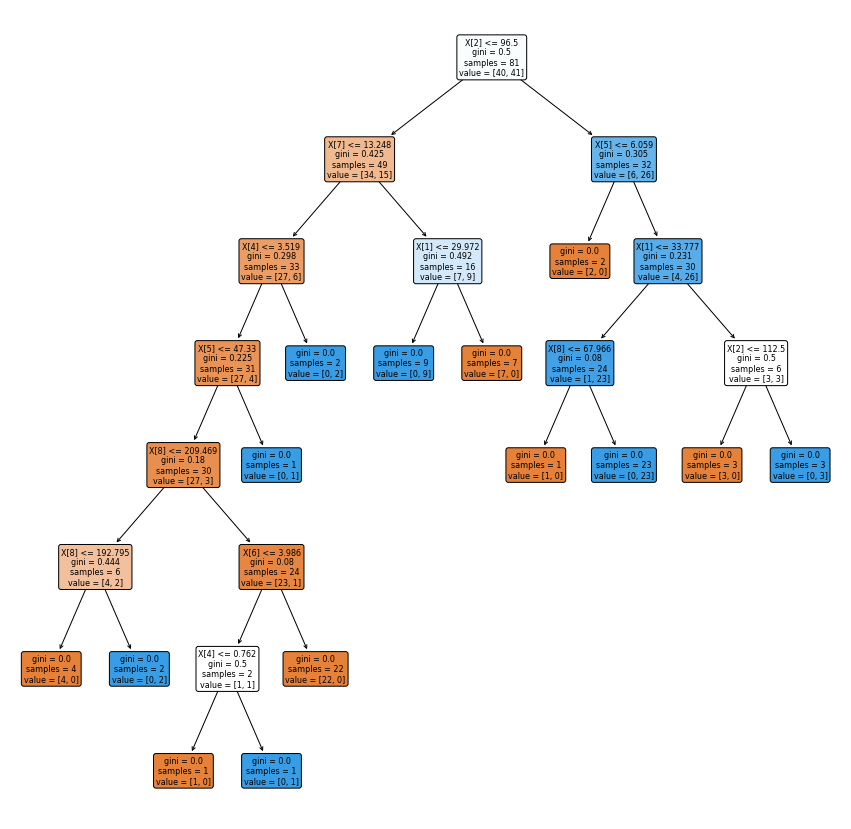

In [34]:
# Visualisasi Decision Tree
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()